In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2024-03-29 01:21:32.559381: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Store data, labels in the list
data=[]
labels=[]

# Road Sign: 43 Classes
classes = 43

In [3]:
%cd gtsrb-german-traffic-sign
cur_path = os.getcwd()
cur_path 

[Errno 2] No such file or directory: 'gtsrb-german-traffic-sign'
/Users/joshna/Downloads


'/Users/joshna/Downloads'

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'/Users/joshna/Downloads/archive/Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
# Load data & Labels
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [7]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# 43 classes for 43 in the Dense
model.add(Dense(43, activation='softmax'))
model.summary()

/Users/joshna/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 145s 142ms/step - accuracy: 0.2975 - loss: 3.9963 - val_accuracy: 0.9152 - val_loss: 0.3332
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 106s 105ms/step - accuracy: 0.8198 - loss: 0.6302 - val_accuracy: 0.9643 - val_loss: 0.1345
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 141s 104ms/step - accuracy: 0.8970 - loss: 0.3627 - val_accuracy: 0.9793 - val_loss: 0.0827
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 119s 122ms/step - accuracy: 0.9213 - loss: 0.2823 - val_accuracy: 0.9841 - val_loss: 0.0577
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 129s 132ms/step - accuracy: 0.9387 - loss: 0.2226 - val_accuracy: 0.9807 - val_loss: 0.0681
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 116s 105ms/step - accuracy: 0.9413 - loss: 0.2148 - val_accuracy: 0.9892 - val_loss: 0.0417
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 104s 106ms/step - accuracy: 0.9457 - loss: 0.2048 - val_accuracy: 0.9889 - val_loss: 0.0425
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 104s 106ms/step - accuracy: 0.9499 -

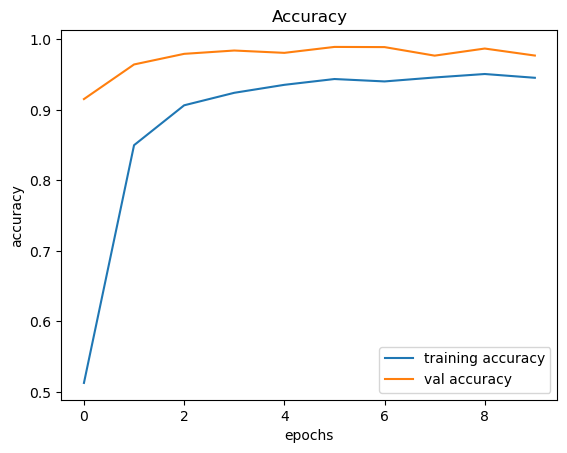

In [14]:
# Accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

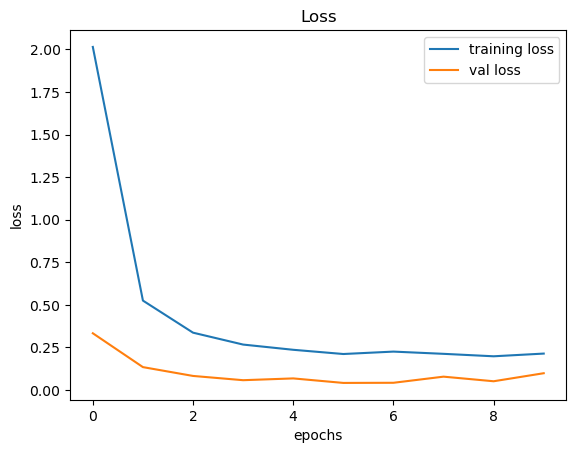

In [15]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()